Epoch 1/2000
8/8 [==============================] - 2s 49ms/step - loss: 0.8608 - val_loss: 0.8464
Epoch 2/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.7107 - val_loss: 0.6864
Epoch 3/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.5654 - val_loss: 0.5343
Epoch 4/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.4456 - val_loss: 0.4359
Epoch 5/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3669 - val_loss: 0.3885
Epoch 6/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.3266 - val_loss: 0.3582
Epoch 7/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.2962 - val_loss: 0.3254
Epoch 8/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2715 - val_loss: 0.3086
Epoch 9/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2505 - val_loss: 0.2889
Epoch 10/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2321 - val_loss: 0.2735
Epoch 11/

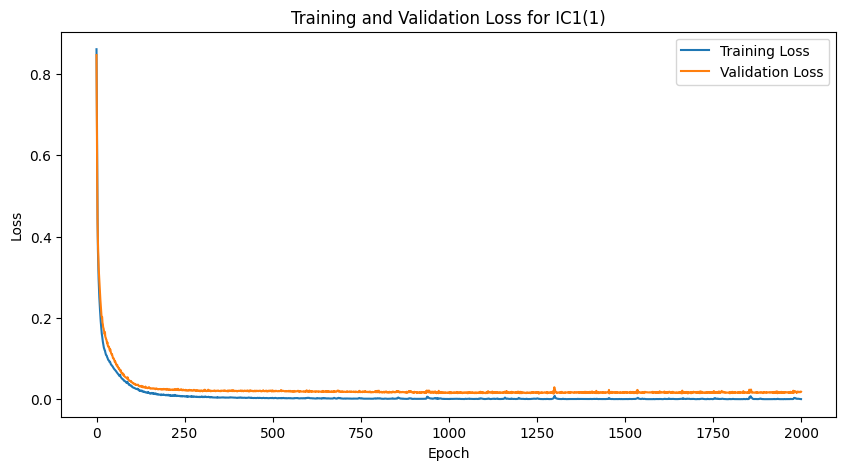

1/1 [==============================] - 0s 36ms/step
Predictions for new inputs (IC1(1)):
Maximum (V): 2.23799991607666
Minimum (V): 0.19300000369548798
Overshoot 1st Rising (V): 0.07699999958276749
Rise Time 20/80 (ns): 0.2290000021457672
Fall Time 20/80 (ns): 0.00800000037997961


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


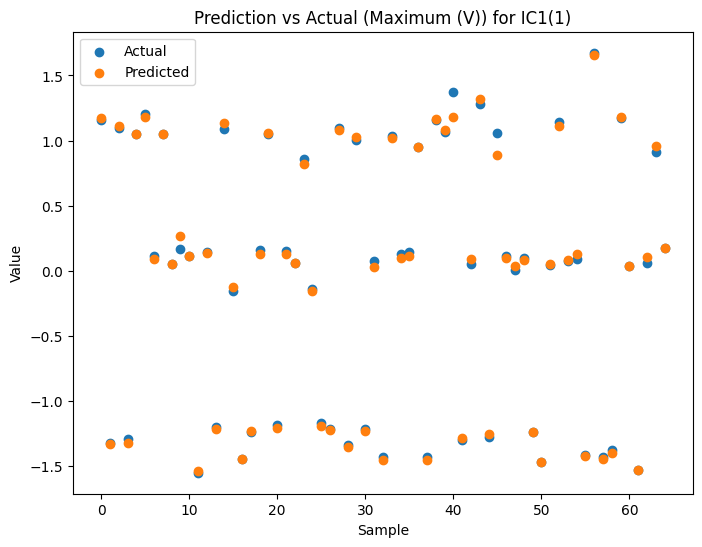

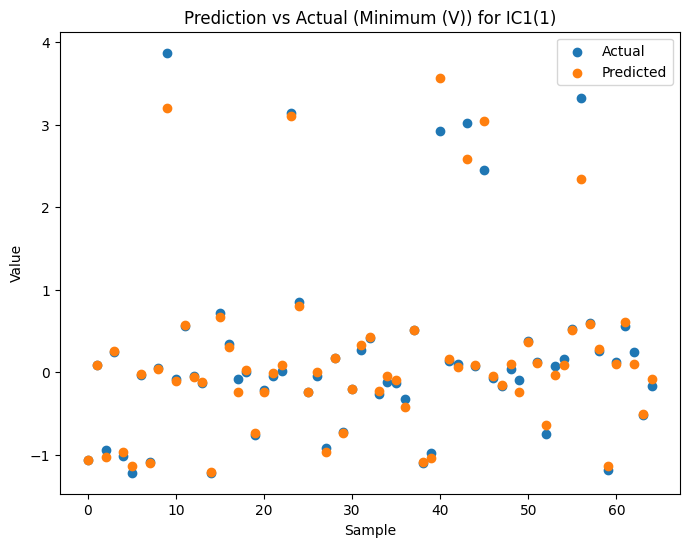

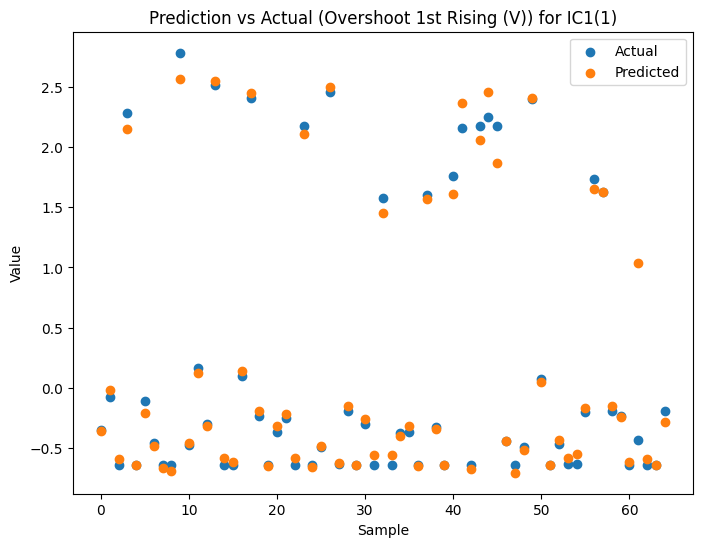

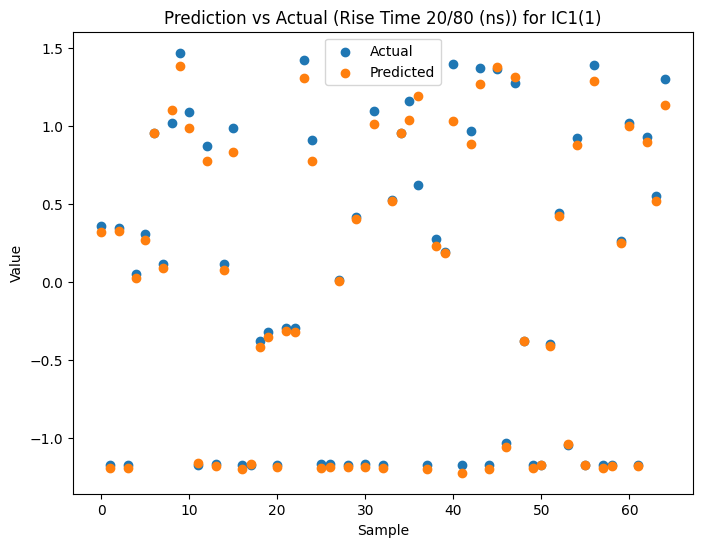

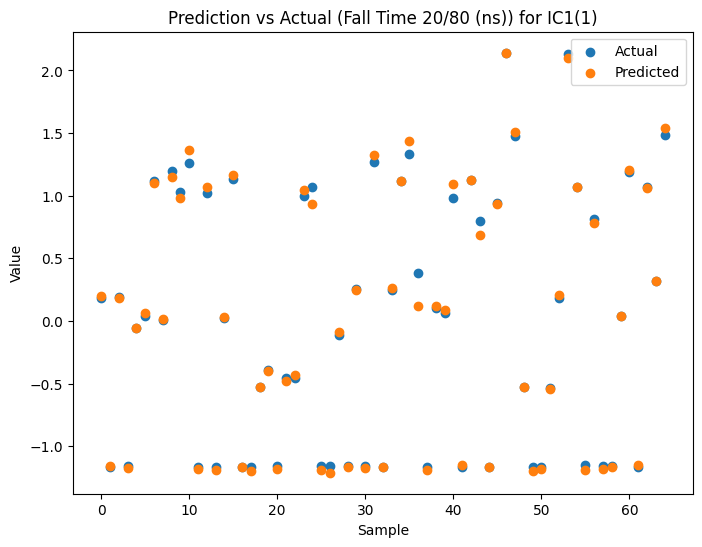

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Read Data from Excel
excel_path = "Data set.xlsx"
sheet_names = ["Transient IC1(1)"]
data = {sheet_name: pd.read_excel(excel_path, sheet_name=sheet_name) for sheet_name in sheet_names}

inputs = data["Transient IC1(1)"]
inputs = inputs.dropna()

X = inputs.iloc[:, 1:7].values.astype(np.float32)
y_ic1_1 = inputs.iloc[:, 7:12].values.astype(np.float32)
# Name inputs and outputs
input_names = ['TL1 Length (mm)', 'TL2 Length (mm)', 'R1 (Ohm)', 'TL1 Impedance (Ohm)', 'TL2 Impedance (Ohm)']
output_names = ['Maximum (V)', 'Minimum (V)', 'Overshoot 1st Rising (V)', 'Rise Time 20/80 (ns)', 'Fall Time 20/80 (ns)']

# Normalize input features with mean 0 and variance 1
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize output labels with mean 0 and variance 1
scaler_y = StandardScaler()
y_ic1_1_scaled = scaler_y.fit_transform(y_ic1_1)

# Define and compile the model
model_ic1_1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,), name='input_layer'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer1'), keras.layers.Dense(64, activation='relu', name='hidden_layer2'),
    keras.layers.Dense(5, name='output_layer_ic1')
], name='FFN_model_ic1')

model_ic1_1.compile(optimizer='adam', loss='mse')

# Split data into training and testing sets
X_train_ic1_1, X_test_ic1_1, y_ic1_1_train, y_ic1_1_test = train_test_split(X_scaled, y_ic1_1_scaled, test_size=0.2, random_state=42)

# Train the model
history_ic1_1 = model_ic1_1.fit(X_train_ic1_1, y_ic1_1_train, epochs=2000, validation_data=(X_test_ic1_1, y_ic1_1_test))

# Evaluate the trained model
loss_ic1_1 = model_ic1_1.evaluate(X_test_ic1_1, y_ic1_1_test)
print("IC1(1) Test Loss:", loss_ic1_1)

# Predict using the trained model
predictions_ic1_1_scaled = model_ic1_1.predict(X_test_ic1_1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_ic1_1_test, predictions_ic1_1_scaled)
print('Mean Squared Error (MSE):', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_ic1_1_test, predictions_ic1_1_scaled)
print('Mean Absolute Error (MAE):', mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_ic1_1_test, predictions_ic1_1_scaled)
print('R-squared (R2) Score:', r2)

# Visualize the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_ic1_1.history['loss'], label='Training Loss')
plt.plot(history_ic1_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for IC1(1)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predictions for new inputs (IC1(1))
new_inputs = np.array([[50, 50, 50, 100, 103.544, 108]], dtype=np.float32)
new_inputs_scaled = scaler_X.transform(new_inputs)  # Scale the new inputs
predictions_ic1_1_new = model_ic1_1.predict(new_inputs_scaled)

# Inverse transform the predictions to original scale
predictions_ic1_1_new = scaler_y.inverse_transform(predictions_ic1_1_new)

# Round predictions to 3 decimals
predictions_ic1_1_rounded = np.round(predictions_ic1_1_new, decimals=3)

print("Predictions for new inputs (IC1(1)):")
for i, output_name in enumerate(output_names):
    print(f"{output_name}: {predictions_ic1_1_rounded[0][i]}")

# Save the model
model_ic1_1.save("path/to/save/model_ic1_1.h5")

for i, output_name in enumerate(output_names):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_ic1_1_test)), y_ic1_1_test[:, i], label='Actual')
    plt.scatter(range(len(y_ic1_1_test)), predictions_ic1_1_scaled[:, i], label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title(f'Prediction vs Actual ({output_name}) for IC1(1)')
    plt.legend()
    plt.show()




In [ ]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values for Maximum (V)
plt.scatter(range(len(y_test)), y_test[:, 0], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 0], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Maximum)')
plt.legend()
plt.show()

# Plotting the predicted and actual values for Minimum (V)
plt.scatter(range(len(y_test)), y_test[:, 1], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 1], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Minimum)')
plt.legend()
plt.show()

# Plotting the predicted and actual values for Overshoot 1st Rising (V)
plt.scatter(range(len(y_test)), y_test[:, 2], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 2], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Overshoot 1st Rising)')
plt.legend()
plt.show()

# Plotting the predicted and actual values for Rise Time 20/80 (ns)
plt.scatter(range(len(y_test)), y_test[:, 3], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 3], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Rise Time 20/80)')
plt.legend()
plt.show()

# Plotting the predicted and actual values for Fall Time 20/80 (ns)
plt.scatter(range(len(y_test)), y_test[:, 4], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 4], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Fall Time 20/80)')
plt.legend()
plt.show()

# Plotting the predicted and actual values for Slew Rate Setup Rising (V/ns)
plt.scatter(range(len(y_test)), y_test[:, 5], label='Actual')
plt.scatter(range(len(y_test)), predictions[:, 5], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Prediction vs Actual (Slew Rate Setup Rising)')
plt.legend()
plt.show()


NameError: name 'scaler_y' is not defined

Epoch 1/100
15/15 [==============================] - 1s 19ms/step - loss: 115.8683 - val_loss: 33.1609
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 16.2796 - val_loss: 12.2178
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 6.2104 - val_loss: 4.3180
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 3.0162 - val_loss: 2.3945
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.9573 - val_loss: 1.6516
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 1.4235 - val_loss: 1.2295
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0834 - val_loss: 0.9572
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8859 - val_loss: 0.8231
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7794 - val_loss: 0.6988
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6637 - val_loss: 0.6225
Epo

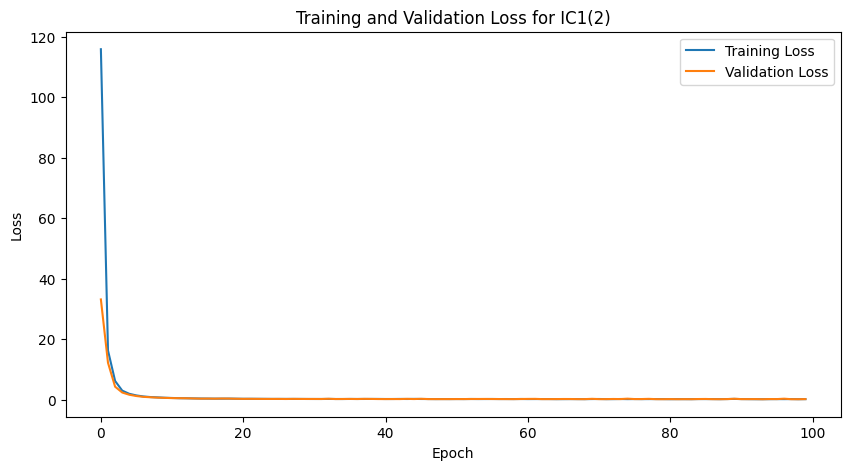

1/1 [==============================] - 0s 87ms/step
Predictions for new inputs (IC1(2)): [[0.801 0.372 0.512 2.172 0.172]]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

excel_path = "Data set.xlsx"
sheet_names = ["Transient IC1(2)"]
data = {sheet_name: pd.read_excel(excel_path, sheet_name=sheet_name) for sheet_name in sheet_names}

inputs = data["Transient IC1(2)"]

inputs = inputs.dropna()

X = inputs.iloc[:, 1:7].values.astype(np.float32)
y_ic1_2 = inputs.iloc[:, 7:12].values.astype(np.float32)

model_ic1_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,), name='input_layer'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer'),
    keras.layers.Dense(5, name='output_layer_ic1')
], name='FFN_model_ic1_2')

model_ic1_2.compile(optimizer='adam', loss='mse')

X_train_ic1_2, X_test_ic1_2, y_ic1_2_train, y_ic1_2_test = train_test_split(X, y_ic1_2, test_size=0.2, random_state=42)
history_ic1_2 = model_ic1_2.fit(X_train_ic1_2, y_ic1_2_train, epochs=100, validation_data=(X_test_ic1_2, y_ic1_2_test))

loss_ic1_2 = model_ic1_2.evaluate(X_test_ic1_2, y_ic1_2_test)
print("IC1(2) Test Loss:", loss_ic1_2)

plt.figure(figsize=(10, 5))
plt.plot(history_ic1_2.history['loss'], label='Training Loss')
plt.plot(history_ic1_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for IC1(2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

new_inputs = np.array([[50, 50, 50, 50, 50, 50]], dtype=np.float32)
predictions_ic1_2 = model_ic1_2.predict(new_inputs)

print("Predictions for new inputs (IC1(2)):", np.round(predictions_ic1_2, decimals=3))

model_ic1_2.save("path/to/save/model_ic1_2.h5")
